<a href="https://colab.research.google.com/github/sayanghorui/samplecode/blob/master/practice_keras_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Numpy Implementation of simple RNN

In [0]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64
inputs = np.random.random((timesteps, input_features))
inputs.shape

(100, 32)

In [0]:
state_t = np.zeros((output_features,))

In [0]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

In [5]:
print('W:', W.shape)
print('U:', U.shape)
print('b:', b.shape)

W: (64, 32)
U: (64, 64)
b: (64,)


In [0]:
successive_outputs = []
for input_t in inputs:
    #print(input_t.shape)
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.concatenate(successive_outputs, axis=0)

### Model using Simple RNN of Keras

In [7]:
from keras.datasets import imdb
from keras.preprocessing import sequence

Using TensorFlow backend.


In [8]:
max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)




Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 20s 993us/step - loss: 0.5836 - acc: 0.6881 - val_loss: 0.4061 - val_acc: 0.8246
Epoch 2/10
20000/20000 [==============================] - 19s 962us/step - loss: 0.3603 - acc: 0.8527 - val_loss: 0.9602 - val_acc: 0.6460
Epoch 3/10
20000/20000 [==============================] - 19s 951us/step - loss: 0.2749 - acc: 0.8949 - val_loss: 0.3447 - val_acc: 0.8694
Epoch 4/10
20000/20000 [==============================] - 19s 966us/step - loss: 0.2173 - acc: 0.9185 - val_loss: 0.4647 - val_acc: 0.8402
Epoch 5/10
20000/20000 [==============================] - 19s 967us/step - loss: 0.1719 - acc: 0.9371 - val_loss: 0.3508 - val_acc: 0.8684
Epoch 6/10
20000/20000 [==============================] - 19s 955us/step - loss: 0.1214 - acc: 0.9580 - val_loss: 0.5101 - val_acc: 0.7656
Epoch 7/10
20000/20000 [==============================] - 19s 965us/step - loss: 0.0923 - acc: 0.9713 - val_l

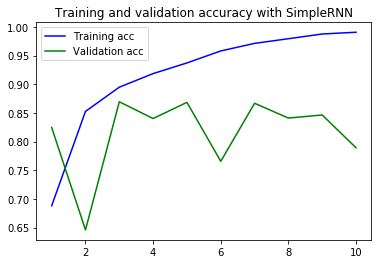

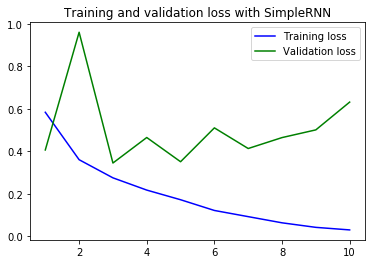

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy with SimpleRNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss with SimpleRNN')
plt.legend()

plt.show()

###Model using LSTM of Keras

In [0]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(input_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.5298 - acc: 0.7442 - val_loss: 0.4464 - val_acc: 0.8218
Epoch 2/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.3121 - acc: 0.8795 - val_loss: 0.2985 - val_acc: 0.8824
Epoch 3/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.2389 - acc: 0.9102 - val_loss: 0.8520 - val_acc: 0.7570
Epoch 4/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.2090 - acc: 0.9234 - val_loss: 0.3097 - val_acc: 0.8674
Epoch 5/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1814 - acc: 0.9333 - val_loss: 0.2889 - val_acc: 0.8912
Epoch 6/10
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1586 - acc: 0.9420 - val_loss: 0.3199 - val_acc: 0.8900
Epoch 7/10
20000/20000 [==============================] - 88s 4ms/step - loss: 0.1456 - acc: 0.9480 - val_loss: 0.3443 - val_acc:

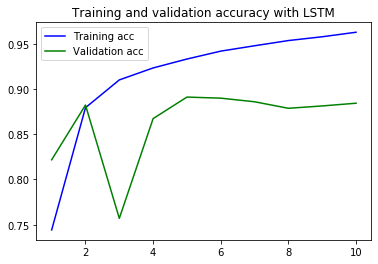

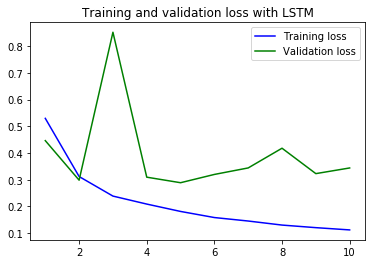

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy with LSTM')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss with LSTM')
plt.legend()

plt.show()